In [24]:
import pandas as pd
import numpy as np

import math
from math import sqrt
from scipy.linalg import fractional_matrix_power

In [2]:
df = pd.read_csv('data.csv', index_col=None)
df

,close_gold,close_silver,close_copper,close_oil,close_gas
0,278.299988,5.003,0.8850,33.099998,4.780
1,277.000000,5.004,0.8890,33.380001,4.835
2,275.799988,4.998,0.9060,33.799999,4.960
3,274.200012,4.983,0.9015,34.950001,5.065
4,274.000000,4.935,0.9060,35.330002,4.998
...,...,...,...,...,...
2051,806.700012,10.420,1.4385,35.400002,4.843
2052,839.299988,11.195,1.5135,36.509998,4.801
2053,854.599976,11.158,1.4900,38.740002,4.642
2054,849.599976,11.315,1.4190,43.549999,4.780


Tentatively, use only gold prices.

In [3]:
# df_gold = df['close_gold']
# df_gold

In [3]:
# daily price change
df['price_change'] = df['close_gold'].diff()

# stdev
df['std_5D'] = df['price_change'].rolling(window=5).std()
df

,close_gold,close_silver,close_copper,close_oil,close_gas,price_change,std_5D
0,278.299988,5.003,0.8850,33.099998,4.780,NaN,NaN
1,277.000000,5.004,0.8890,33.380001,4.835,-1.299988,NaN
2,275.799988,4.998,0.9060,33.799999,4.960,-1.200012,NaN
3,274.200012,4.983,0.9015,34.950001,5.065,-1.599976,NaN
4,274.000000,4.935,0.9060,35.330002,4.998,-0.200012,NaN
...,...,...,...,...,...,...,...
2051,806.700012,10.420,1.4385,35.400002,4.843,-1.500000,14.615838
2052,839.299988,11.195,1.5135,36.509998,4.801,32.599976,24.071028
2053,854.599976,11.158,1.4900,38.740002,4.642,15.299988,17.359791
2054,849.599976,11.315,1.4190,43.549999,4.780,-5.000000,17.969816


# Return Predictors

In [4]:
# average past 5 days' price changes, divided by past 5 days' standard deviation of daily price changes
df['f_5D'] = df['price_change'].rolling(window=5).mean() / df['std_5D']
df

,close_gold,close_silver,close_copper,close_oil,close_gas,price_change,std_5D,f_5D
0,278.299988,5.003,0.8850,33.099998,4.780,NaN,NaN,NaN
1,277.000000,5.004,0.8890,33.380001,4.835,-1.299988,NaN,NaN
2,275.799988,4.998,0.9060,33.799999,4.960,-1.200012,NaN,NaN
3,274.200012,4.983,0.9015,34.950001,5.065,-1.599976,NaN,NaN
4,274.000000,4.935,0.9060,35.330002,4.998,-0.200012,NaN,NaN
...,...,...,...,...,...,...,...,...
2051,806.700012,10.420,1.4385,35.400002,4.843,-1.500000,14.615838,-0.645875
2052,839.299988,11.195,1.5135,36.509998,4.801,32.599976,24.071028,-0.124631
2053,854.599976,11.158,1.4900,38.740002,4.642,15.299988,17.359791,0.395166
2054,849.599976,11.315,1.4190,43.549999,4.780,-5.000000,17.969816,0.328328


In [5]:
# 1 year has 253 trading days
df['std_1Y'] = df['price_change'].rolling(window=253).std()
df['std_5Y'] = df['price_change'].rolling(window=253*5).std()

df['f_1Y'] = df['price_change'].rolling(window=253).mean() / df['std_1Y']
df['f_5Y'] = df['price_change'].rolling(window=253*5).mean() / df['std_5Y']
df

,close_gold,close_silver,close_copper,close_oil,close_gas,price_change,std_5D,f_5D,std_1Y,std_5Y,f_1Y,f_5Y
0,278.299988,5.003,0.8850,33.099998,4.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277.000000,5.004,0.8890,33.380001,4.835,-1.299988,NaN,NaN,NaN,NaN,NaN,NaN
2,275.799988,4.998,0.9060,33.799999,4.960,-1.200012,NaN,NaN,NaN,NaN,NaN,NaN
3,274.200012,4.983,0.9015,34.950001,5.065,-1.599976,NaN,NaN,NaN,NaN,NaN,NaN
4,274.000000,4.935,0.9060,35.330002,4.998,-0.200012,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,806.700012,10.420,1.4385,35.400002,4.843,-1.500000,14.615838,-0.645875,16.412185,9.409700,-0.022710,0.033377
2052,839.299988,11.195,1.5135,36.509998,4.801,32.599976,24.071028,-0.124631,16.493587,9.453372,-0.009897,0.035966
2053,854.599976,11.158,1.4900,38.740002,4.642,15.299988,17.359791,0.395166,16.522093,9.462582,-0.005957,0.037334
2054,849.599976,11.315,1.4190,43.549999,4.780,-5.000000,17.969816,0.328328,16.524725,9.463126,-0.007463,0.036555


# Equation (1)

In [6]:
u = np.random.normal(0,1,len(df)) # (mean, stdev, no of elements in array noise)

df['noise'] = u

In [7]:
# r[t+1] = B * f[t] + u[t+1]

# regression for predicted returns
df['r[t+1]'] = 0.001 + 10.32 * df['f_5D'] + 122.34*df['f_1Y'] - 205.59 * df['f_5Y'] + df['noise']

Q:
- sigma is the corviance of returns, why is the output 1 x 1?
- sigma should have at least 2 dimensions

In [8]:
# variables
rho = 1 - math.exp(-0.02/260) # discount rate corresponding to 2% annualised rate, scalar, pg 23
lambda_c = 10 * 10^7 # scalar

returns = df['r[t+1]'].dropna(axis=0)
sigma = np.cov(returns) # variance-covariance matrix
gamma = 10**(-9) # scalar, pg 23
lambda_upper = lambda_c * sigma

# Transaction cost (TC)
# TC = 1/2 * dx_x[t].T * arrow * dx_x[t]

# Used in proof
rho_bar = 1 - rho # discount factor, scalar
lambda_upper_bar = (1/rho_bar) * lambda_upper

Where to find B (pg 22):

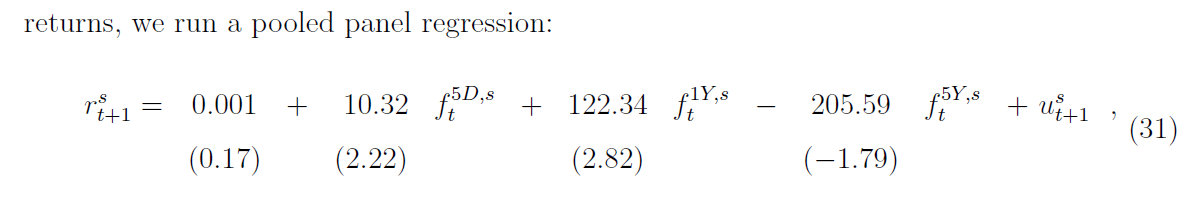

In [9]:
# S = number of assets
# B = S * K matrix, weights or coeffs of f[t]s
B = np.array([[0.001, 10.32, 122.34, -205.59]]).T
phi = np.array([[1, -0.2519, -0.0034, -0.0010]]).T

In [10]:
# f[t] = K * 1 vector, Sharpe Ratio
f_t = [1, df['f_5D'].iloc[-1], df['f_1Y'].iloc[-1], df['f_5Y'].iloc[-1]]

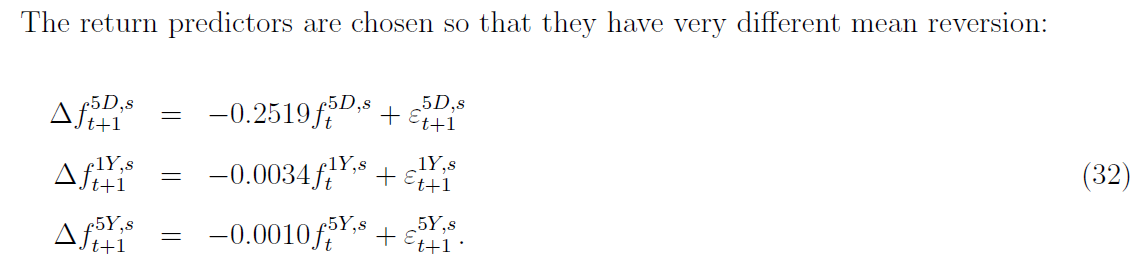

In [ ]:
f[t+1] = [1, -0.2519, -0.0034, -0.0010] * f_t

In [ ]:
# paramters stated in pg 12
f_0 = np.array([[1,1]]).T
B = np.identity(2)
phi_1 = 0.1
phi_2 = 0.4
sigma = np.identity(2)
gamma = 0.5
rho = 0.05
lambda_upper = 2*sigma

In [40]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

## From Proof

In [11]:
# M = fractional_matrix_power(lambda_upper_bar, -0.5) * sigma * fractional_matrix_power(lambda_upper_bar, -0.5)

M = lambda_upper_bar**(-1/2) * sigma * lambda_upper_bar**(-1/2)

A_xx = lambda_upper_bar**(1/2) * ( (rho_bar*gamma*M + (1/4)*(rho+gamma*M)**2)**(1/2) - (1/2)*(rho+gamma*M) ) * lambda_upper_bar**(1/2)
A_xx

0.0007711887903249977

Q:
- What is A_0?
- If I need x[t-1] to find j_t, then what's the point of finding j_t?
- when coding out the equations, there shouldn't be a value for epsilon?

In [12]:
J_t = gamma*sigma + lambda_upper_bar + A_xx

# j_t = (B + A_xf*(np.identity(1) - phi))*f_t + lambda_upper_bar* x[t-1]

d_t = -1/2 * x[t-1].T * lambda_upper_bar * x[t-1] + 1/2 * f[t].T * (np.identity(1) - phi).T * A_ff * (np.identity(1) - phi)*f[t]
+ 1/2 * E[t](epsilon_(t+1).T * A_ff * epsilon_(t+1)) + A_0

SyntaxError: invalid syntax (<ipython-input-12-001df1dc4b36>, line 5)

In [13]:
# max value attained by
# x[t] = np.linalg.inv(J_t) * j_t

In [14]:
A_xf = rho_bar * (np.identity(1)- np.outer(rho_bar*(np.identity(1) - phi).T, np.identity(1) - A_xx*(1/lambda_upper)) )**-1 * (np.identity(1) - A_xx*(1/lambda_upper)*B)
A_xf

array([[ 9.99923080e-01],
       [-3.97103920e+00],
       [-3.00933279e+02],
       [-1.08352002e+03]])

In [15]:
Q = (B + A_xf * (np.identity(1) - phi)).T * (gamma*sigma + lambda_upper_bar + A_xx)**(-1) * (B + A_xf*(np.identity(1) - phi))

In [16]:
Q

array([[ 1.69964336e-10,  9.09080768e-07, -3.05283910e-05,
        -2.19286889e-04],
       [ 9.09080768e-07,  4.86236032e-03, -1.63285862e-01,
        -1.17289014e+00],
       [-3.05283910e-05, -1.63285862e-01,  5.48340129e+00,
         3.93875330e+01],
       [-2.19286889e-04, -1.17289014e+00,  3.93875330e+01,
         2.82922528e+02]])

In [18]:
A_ff = rho_bar * np.linalg.inv( (np.identity(1) - np.outer(rho_bar(np.identity(1) - phi).T), (np.identity(1) - phi).T ) ) * Q

TypeError: 'float' object is not callable

# Proposition 2 Trade Partially Towards Aim 

In [20]:
lambda_upper

5883.133920482922

In [19]:
np.linalg.inv(lambda_upper)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
# optimal portfolio (i)
x[t] = x[t-1] + np.linalg.inv(lambda_upper) * A_xx * (aim[t] - x[t-1])

## Equation (8)

In [21]:
aim[t] = np.linalg.inv(A_xx) * A_xf * f_t 

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [34]:
# optimal trading rate is alpha/lambda_c < 1 (ii)
top_alpha = -(gamma*(1 - rho) + lambda_c*rho) + sqrt((gamma*(1 - rho) + lambda_c*rho)**2 + 4*gamma*lambda_c*(1 - rho)**2)
bottom_alpha = 2*(1-rho)
alpha = top_alpha / bottom_alpha
alpha
# trading rate is decreasing in transaction costs lambda and increasing in risk aversion gamma

1.2977384379498872e-05

In [36]:
x[t] = (1 - alpha/lambda_c) * x[t-1] + alpha/lambda_c * aim[t]

NameError: name 'x' is not defined

## Equation (11)

In [37]:
markowitz[t] = np.linalg.inv(gamma*sigma) * B * f_t

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
# A_xx = alpha*sigma

# Proposition 3 (Aim in Front of Target)
(i) Aim portfolio is the weighted average of current Markowitz portflio and expected future aim portfolio <br>

In [38]:
z = gamma/(gamma + alpha)
z

7.70511930267404e-05

Q:
- What is the expectation of Markowitz when there's no prob?
E[x] = p * x

Conditional expectation of value of portfolio at t+1 <br>
Expectation of portfolio at t+1, observed at time t <br>
Condition: observe price at time t, think will go to X at t <br>


In [ ]:
aim[t] = z * markowitz[t] + (1 - z) * expectation(aim[t+1])

Another expression of aim[t]:

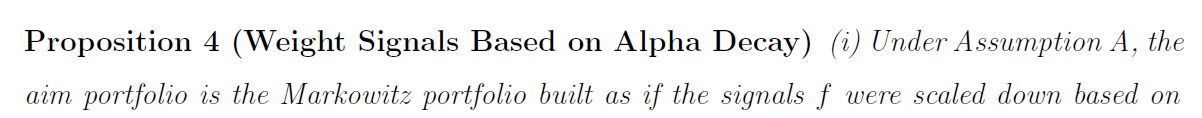

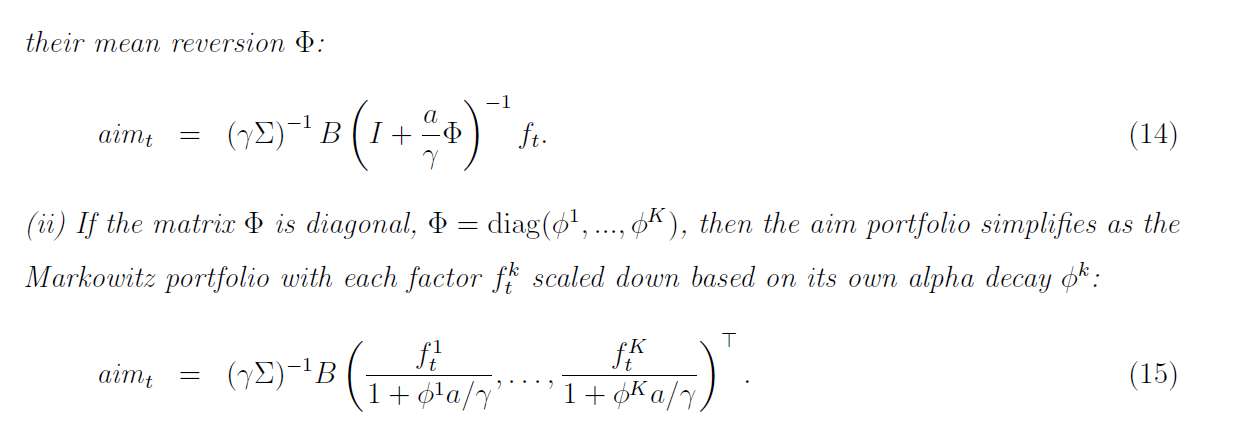

Another expression of x[t]: <br>
the optimal portfolio is an exponentially weighted average of current and past aim portfolios.

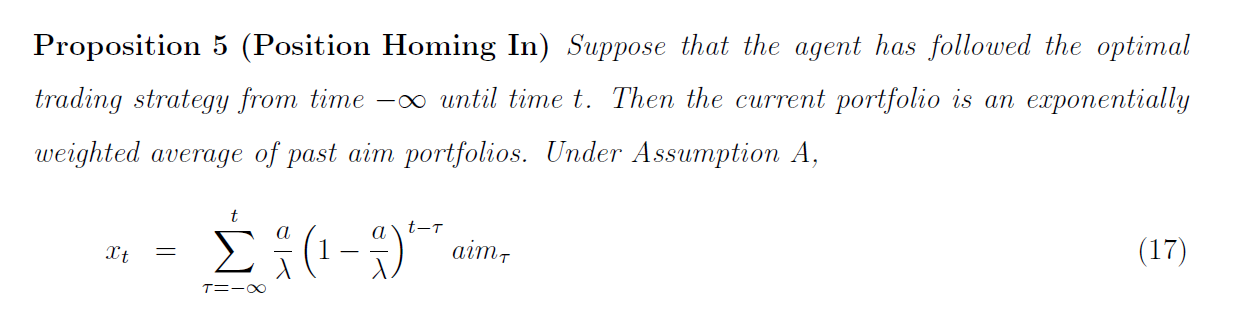

# Proposition 6
The optimal portfolio x[t] is:

In [ ]:
x[t] = x[t-1] + M_rate * (aim[t] - x[t-1])